# Lecture 3-8: Morphological Operations

## 0.- Initialize filesystem and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image, display

In [ ]:
!pip install pydicom
import pydicom

## 1.- Introduction to Morphological Operations

Morphological operations are a set of techniques in image processing that focus on the **analysis and manipulation of shapes** within an image.

The **goal** of morphological operations is to **remove noise**, **enhance the structure** of objects, and **extract relevant features** based on their geometric properties. These operations can be applied to **binary** (with only two pixel values: 0 and 1) or **grayscale** images.

Morphological operations are based on the concept of a **structuring element** (a small matrix or kernel) that **slides over the image** to apply the operation. The choice of the structuring element, including its **size and shape**, determines the outcome of the morphological operation.

These techniques are commonly used as a **pre-processing or post-processing step to segmentation**, for operations such as **cleaning up noise, filling holes, or defining boundaries**.

In **medical image processing**, morphological operations are useful for tasks like segmenting organs or tumors, removing noise from scans, and highlighting specific anatomical structures.




## 2.- Basic Morphological Operations

Morphological operations are used to process images based on their shapes by transforming an image through a matrix or kernel known as **structuring element**.

The **size and shape** of the structuring element is important and affects the result. The structuring element has a defined **origin**, which usually corresponds at its **center**.

### 2.1. Dilation

Dilation is one of the fundamental operations in morphological image processing, and is used to **expand the boundaries** of objects in an image.

Let us assume a **binarized image**, with **white pixels** (value = 1) in the foreground and **black pixels** (value = 0) in the background. Dilation allows the **foreground pixels** in an image **to expand**, so it can be used to **fill small holes** in objects and to **combine objects that are close** enough but not connected.

Dilation results in **another binarized image**, $I'$, result of the combination of the input image $I$ with the structuring element $S$, and is denoted as $I \mathbin{\oplus} S$

In general, **the bigger the structuring element, the larger the dilation effect** (the more the object grows). The **shape** (square or rectangular) also determines the result.

The **algorithm** of dilation can be summarized in the following steps:

1. **Position the origin** of the structured element at the first (top-left) pixel in the image.

2. Check all pixels in the **overlapping region** between the structuring element $S$ and the image $I$.

3. Perform a **max operation** (max spatial filter):
  * if **any** of the pixels in the structuring element overlaps with a foreground pixel (value 1) in $I$, set the value of the output pixel at the position of the origin to 1,
  * if **none** of the pixels overlap with a foreground pixel, set the value to 0.

4. **Move** the structuring element to the next pixel in the image **and repeat** the overlap check and max operation until the entire image has been processed.

5. The **result** is a new image $I'$, where the objects in the input image $I$ have been expanded according to the shape and size of $S$.



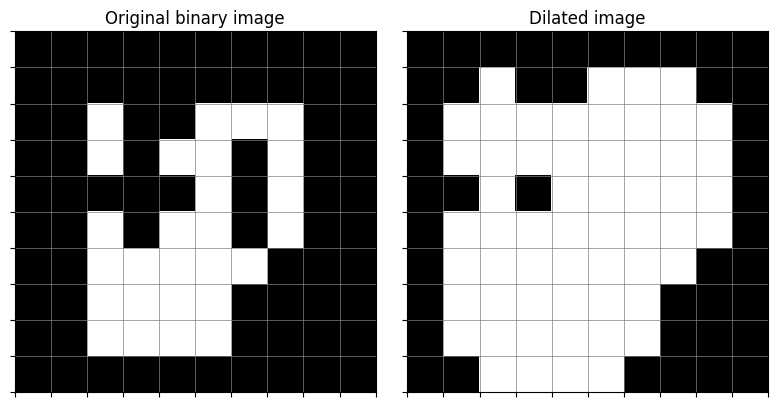

In [ ]:
# Create a synthetic binary image
binary_image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
                         [0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
                         [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                         [0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                         [0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                         [0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

# Define a structuring element for dilation
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]], dtype=np.uint8)

# Perform dilation using the structuring element
# iterations indicates the number of repetitions of the dilation operation
dilated_image = cv2.dilate(binary_image, structuring_element, iterations=1)

# Plot the original and dilated images with a grid
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original binary image')
# Customize the x- and y-axis tick marks:
# - np.arange(-0.5, 10, 1) generates an array of numbers starting at -0.5,
#   ending at 10 (exclusive), with a step of 1, so the ticks will be at
#   positions [-0.5, 0.5, 1.5, 2.5, ..., 9.5]
# - [] is an empty list, meaning no labels will be displayed
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Dilated image
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

In OpenCV, `cv2.dilate` and other similar functions handle border padding by default using the **nearest neighbor** or replicate mode (the pixels outside the image border are considered equal to the nearest pixel inside the image's border).

OpenCV does not allow to explicitly change the padding mode. However, it can be **manually padded** before applying the morphological operation using the `cv2.copyMakeBorder` function.

#### **Dilation in grayscale images**

In the case of **dilation in grayscale images** ($I$), pixels have intensity values in the defined range (0-255), whereas the **structuring element** has **binary** values (0,1).

The algorithm is similar to binarized images. However, in step 3, the **result of the max operation is the maximum value** taken from the pixels in the image that overlap with a foreground pixel (1) in the structuring element.

The result of the algorithm is **another grayscale image** $I'$, with the objects grown with respect to those in the original image.

The **effect** of dilation on grayscale images is to **increase the number of bright pixels**, expanding their surroundings, and to make the **small dark objects disappear**. The elements may be altered or blurred with the change in size of bright and dark areas, losing important information.



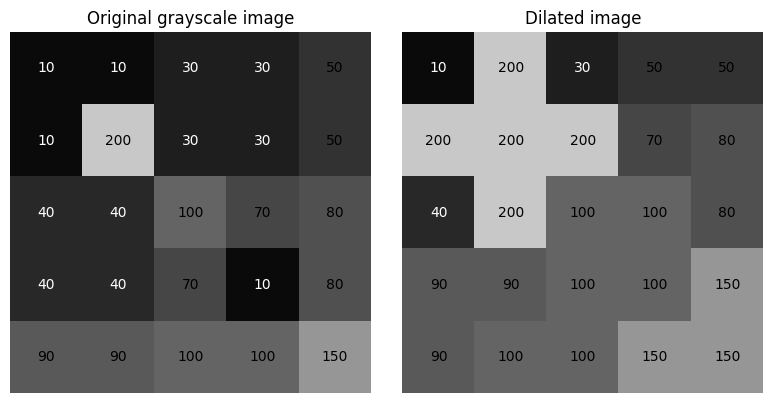

In [ ]:
# Create a synthetic grayscale image
grayscale_image = np.array([[10, 10, 30, 30, 50],
                            [10, 200, 30, 30, 50],
                            [40, 40, 100, 70, 80],
                            [40, 40, 70, 10, 80],
                            [90, 90, 100, 100, 150]], dtype=np.uint8)

# Define a structuring element for dilation (3x3 rectangular kernel)
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]], dtype=np.uint8)

# Perform dilation using the structuring element
dilated_image = cv2.dilate(grayscale_image, structuring_element, iterations=1)

# Plot the original and dilated images with values inside cells
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original grayscale image')
plt.axis('off')
for i in range(grayscale_image.shape[0]):
    for j in range(grayscale_image.shape[1]):
        text_color = 'white' if grayscale_image[i, j] < 50 else 'black'
        plt.text(j, i, str(grayscale_image[i, j]), ha='center', va='center', color=text_color)

# Dilated image
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated image')
plt.axis('off')
for i in range(dilated_image.shape[0]):
    for j in range(dilated_image.shape[1]):
        text_color = 'white' if dilated_image[i, j] < 50 else 'black'
        plt.text(j, i, str(dilated_image[i, j]), ha='center', va='center', color=text_color)

plt.tight_layout()
plt.show()

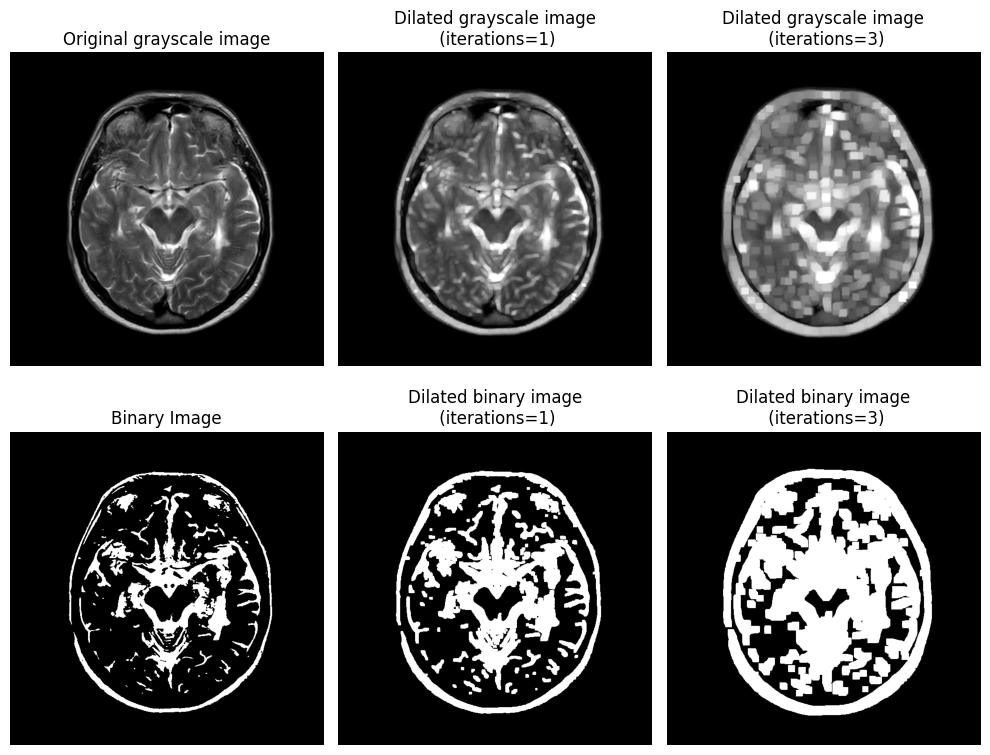

In [ ]:
# Load a real grayscale image
image_path = '/content/drive/MyDrive/PIM/Images/MRI_1.jpg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image using a threshold
threshold = 100
_, binary_image = cv2.threshold(grayscale_image, threshold, 255, cv2.THRESH_BINARY)

# Define the size of the structuring element
structuring_element_size = 5
structuring_element = np.ones((structuring_element_size, structuring_element_size),
                              dtype=np.uint8)

# Perform dilation on the grayscale image
dilated_image_1 = cv2.dilate(grayscale_image, structuring_element, iterations=1)
dilated_image_3 = cv2.dilate(grayscale_image, structuring_element, iterations=3)

# Perform dilation on the binary image
dilated_binary_image_1 = cv2.dilate(binary_image, structuring_element, iterations=1)
dilated_binary_image_3 = cv2.dilate(binary_image, structuring_element, iterations=3)

# Plot the original and dilated images using subplot
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original grayscale image')
plt.axis('off')

# Dilatied image applied to the grayscale image (iterations=1)
plt.subplot(2, 3, 2)
plt.imshow(dilated_image_1, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated grayscale image\n (iterations=1)')
plt.axis('off')

# Dilatied image applied to the grayscale image (iterations=3)
plt.subplot(2, 3, 3)
plt.imshow(dilated_image_3, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated grayscale image\n (iterations=3)')
plt.axis('off')

# Binary image
plt.subplot(2, 3, 4)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Binary Image')
plt.axis('off')

# Dilated image applied to the binary image (iterations=1)
plt.subplot(2, 3, 5)
plt.imshow(dilated_binary_image_1, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated binary image\n (iterations=1)')
plt.axis('off')

# Dilated image applied to the binary image (iterations=3)
plt.subplot(2, 3, 6)
plt.imshow(dilated_binary_image_3, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated binary image\n (iterations=3)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 2.2. Erosion


Erosion is opposite of dilation. It is used to **shrink objects by removing pixels from their boundaries**.

Erosion of an image $I$ with the structuring element $S$ results in another image $I'$ and is denoted as $I \mathbin{\ominus} S$.

The algorithm of erosion is similar to that of dilation, except that it performs the **min operation** in step 3 instead of the max operation.

As in dilation, the **size and shape** of the structuring element affect the resulting image.

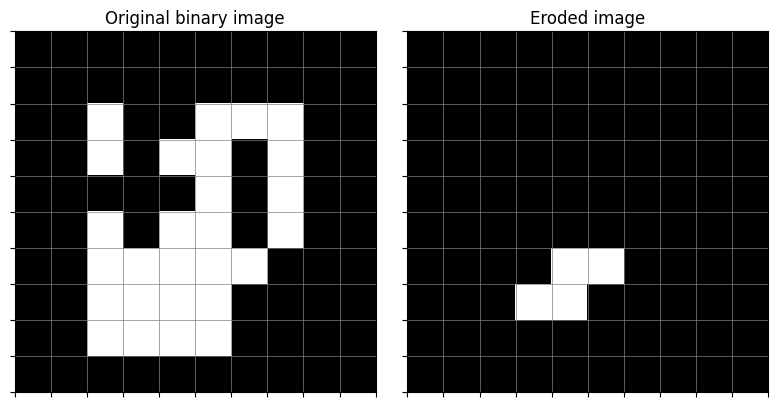

In [ ]:
# Create a synthetic binary image
binary_image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
                         [0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
                         [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                         [0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                         [0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                         [0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

# Define a structuring element for dilation
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]], dtype=np.uint8)

# Perform erosion using the structuring element
eroded_image = cv2.erode(binary_image, structuring_element, iterations=1)

# Plot the original and eroded images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.title('Original binary image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Eroded image
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray', vmin=0, vmax=1)
plt.title('Eroded image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

#### **Erosion in grayscale images**


Dilation applied to **grayscale images** results in another grayscale image where the **bright areas have shrunk**, **small areas with high intensity** have **disappeared**, and the **number of dark pixels** have **increased**. As a result, the **output image will be darker** than the original one.

The algorithm is similar to dilation for grayscale images, but taking the **minimum value** in step 3 from the pixels in the image that overlap with a foreground pixel (1) in the structuring element.

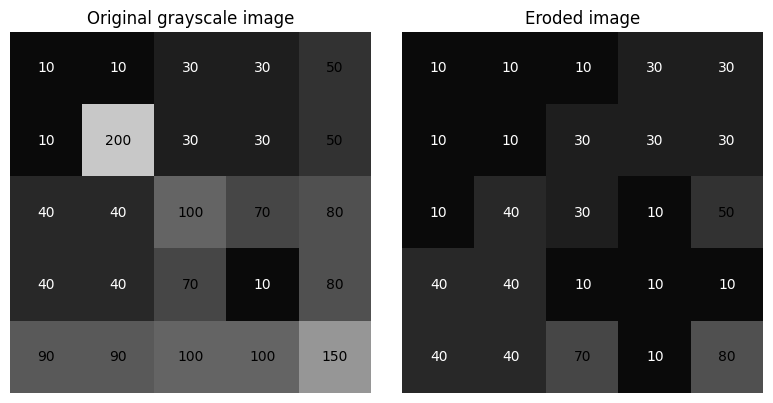

In [ ]:
# Create a synthetic grayscale image
grayscale_image = np.array([[10, 10, 30, 30, 50],
                            [10, 200, 30, 30, 50],
                            [40, 40, 100, 70, 80],
                            [40, 40, 70, 10, 80],
                            [90, 90, 100, 100, 150]], dtype=np.uint8)

# Define a structuring element for erosion (3x3 rectangular kernel)
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]], dtype=np.uint8)

# Perform erosion using the structuring element
eroded_image = cv2.erode(grayscale_image, structuring_element, iterations=1)

# Plot the original and eroded images with values inside cells
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original grayscale image')
plt.axis('off')
for i in range(grayscale_image.shape[0]):
    for j in range(grayscale_image.shape[1]):
        text_color = 'white' if grayscale_image[i, j] < 50 else 'black'
        plt.text(j, i, str(grayscale_image[i, j]), ha='center', va='center', color=text_color)

# Eroded image
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded image')
plt.axis('off')
for i in range(eroded_image.shape[0]):
    for j in range(eroded_image.shape[1]):
        text_color = 'white' if eroded_image[i, j] < 50 else 'black'
        plt.text(j, i, str(eroded_image[i, j]), ha='center', va='center', color=text_color)

plt.tight_layout()
plt.show()

### 2.3. Opening and Closing

Opening and closing are morphological operations obtained by **combining dilation and erosion**. Both can be applied to **binarized or grayscale images**, similarly to dilation and erosion.

**Opening**

Opening is defined as **erosion followed by dilation** of an image $I$ with the structuring element $S$. The result of the opening is another image $I'$, defined as $I \circ S = (I \ominus S) \oplus S$.

Opening is used to:

* **smooth edges**, eliminating foreground pixels,

* **break** thin and long structures,

* **remove small objects** (artifacts) or noise **from the foreground** (bright regions) of an image while enhancing and preserving the shape and size of larger structures.

**Closing**

Closing is defined as a **dilation followed by erosion** of an image with the structuring element: $I \bullet S = (I \oplus S) \ominus S$.

This technique is commonly used to:

* **close small holes** or gaps in objects in the foreground (bright pixels) within an image (filling in small dark areas within larger bright objects or small bright areas within larger dark objects),

* **smooth edges** of objects

* **connect** disconnected structures.

In [ ]:
import cv2
import numpy as np

# Replace the manually defined structuring element with cv2.getStructuringElement
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

print(structuring_element)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


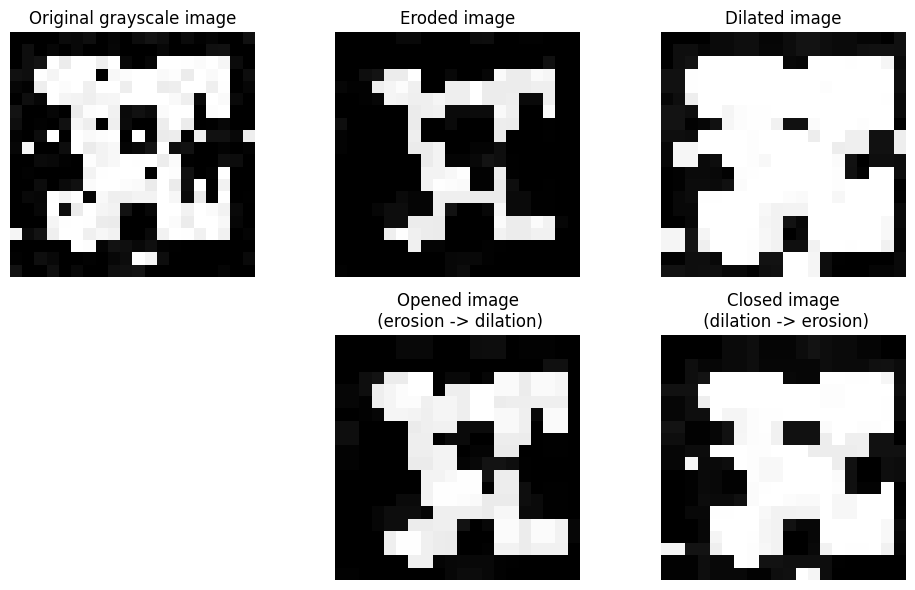

In [ ]:
# Create a 20x20 matrix with values in the range 0-255
image = np.array([
    [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0],
    [  0,   0, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
    [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
    [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0, 255, 255,   0,   0],
    [  0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0, 255, 255, 255,   0, 255, 255,   0,   0],
    [  0,   0,   0,   0,   0, 255, 255,   0, 255,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0],
    [  0,   0,   0, 255,   0, 255, 255, 255, 255,   0, 255,   0, 255, 255,   0, 255,   0,   0,   0, 255],
    [  0, 255,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0, 255, 255,   0,   0,   0, 255,   0,   0],
    [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,   0, 255,   0, 255,   0,   0],
    [  0,   0,   0, 255, 255, 255,   0, 255, 255, 255, 255, 255, 255, 255,   0, 255,   0, 255,   0,   0],
    [  0,   0,   0, 255,   0, 255, 255, 255, 255,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0],
    [  0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0],
    [255,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0],
    [  0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
], dtype=np.uint8)

# Apply small variations to the values to create a grayscale image
variation = np.random.randint(-20, 20, size=image.shape, dtype=np.int16)  # Variations in the range [-50, 50]
grayscale_image = np.clip(image.astype(np.int16) + variation, 0, 255).astype(np.uint8)  # Apply variation and clip to [0, 255]

# Define a structuring element (3x3 rectangular kernel)
# cv2.getStructuringElement(shape, ksize, anchor=None)
# shape: Defines the shape of the structuring element: cv2.MORPH_RECT (rectangular),
#        cv2.MORPH_ELLIPSE (rounded) or cv2.MORPH_CROSS (cross-shaped)
# ksize: tuple that defines the size of the structuring element (width, height)
# anchor (optional): defines the anchor point (the center of the kernel), where
#        (-1, -1) (default value) refers to the center of the kernel
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

# Perform erosion and dilation
eroded_image = cv2.erode(grayscale_image, structuring_element, iterations=1)
dilated_image = cv2.dilate(grayscale_image, structuring_element, iterations=1)

# Perform opening (erosion followed by dilation)
opened_image = cv2.morphologyEx(grayscale_image, cv2.MORPH_OPEN, structuring_element)

# Perform closing (dilation followed by erosion)
closed_image = cv2.morphologyEx(grayscale_image, cv2.MORPH_CLOSE, structuring_element)

# Plot the original, eroded, dilated, opened, and closed images
plt.figure(figsize=(10, 6))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original grayscale image')
plt.axis('off')

# Eroded image
plt.subplot(2, 3, 2)
plt.imshow(eroded_image, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded image')
plt.axis('off')

# Dilated image
plt.subplot(2, 3, 3)
plt.imshow(dilated_image, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated image')
plt.axis('off')

# Opened image
plt.subplot(2, 3, 5)
plt.imshow(opened_image, cmap='gray', vmin=0, vmax=255)
plt.title('Opened image\n (erosion -> dilation)')
plt.axis('off')

# Closed image
plt.subplot(2, 3, 6)
plt.imshow(closed_image, cmap='gray', vmin=0, vmax=255)
plt.title('Closed image\n (dilation -> erosion)')
plt.axis('off')

plt.tight_layout()
plt.show()

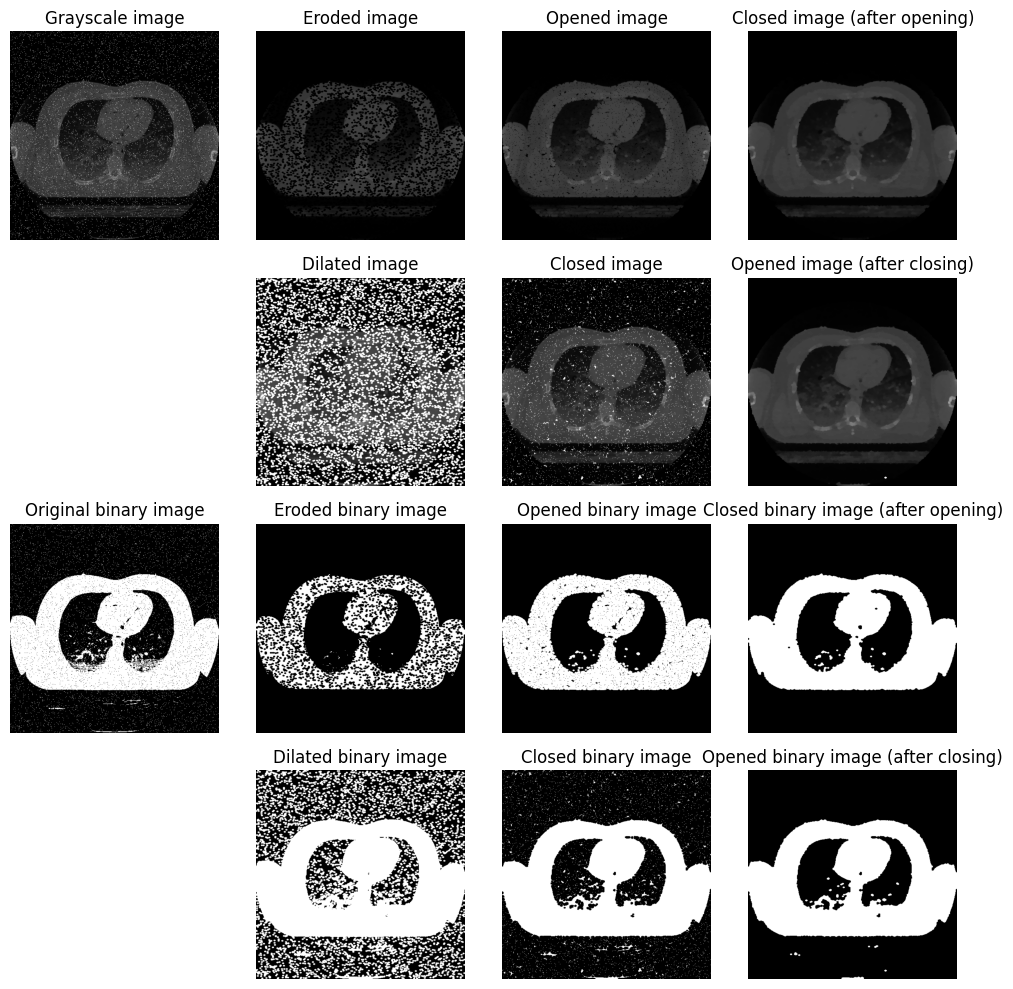

In [ ]:
# Load a grayscale image
image_path = '/content/drive/MyDrive/PIM/Images/CT_saltandpepper.png'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image using a threshold
threshold = 50
_, binary_image = cv2.threshold(grayscale_image, threshold, 255, cv2.THRESH_BINARY)

# Define the size and shape of the structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Perform erosion and dilation on the grayscale image
eroded_image = cv2.erode(grayscale_image, structuring_element, iterations=1)
dilated_image = cv2.dilate(grayscale_image, structuring_element, iterations=1)

# Perform opening (erosion followed by dilation) and then closing
opened_image = cv2.morphologyEx(grayscale_image, cv2.MORPH_OPEN, structuring_element)
closed_image_after_opening = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, structuring_element)

# Perform closing (dilation followed by erosion) and then opening
closed_image = cv2.morphologyEx(grayscale_image, cv2.MORPH_CLOSE, structuring_element)
opened_image_after_closing = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, structuring_element)

# Perform erosion and dilation on the binary image
eroded_binary_image = cv2.erode(binary_image, structuring_element, iterations=1)
dilated_binary_image = cv2.dilate(binary_image, structuring_element, iterations=1)

# Perform opening (erosion followed by dilation) and then closing
opened_binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)
closed_binary_image_after_opening = cv2.morphologyEx(opened_binary_image, cv2.MORPH_CLOSE, structuring_element)

# Perform closing (dilation followed by erosion) and then opening
closed_binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, structuring_element)
opened_binary_image_after_closing = cv2.morphologyEx(closed_binary_image, cv2.MORPH_OPEN, structuring_element)


# Plot the images
plt.figure(figsize=(10, 10))

# Original image
plt.subplot(4, 4, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale image')
plt.axis('off')

# Eroded image
plt.subplot(4, 4, 2)
plt.imshow(eroded_image, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded image')
plt.axis('off')

# Opened image
plt.subplot(4, 4, 3)
plt.imshow(opened_image, cmap='gray', vmin=0, vmax=255)
plt.title('Opened image')
plt.axis('off')

# Closed image (after opening)
plt.subplot(4, 4, 4)
plt.imshow(closed_image_after_opening, cmap='gray', vmin=0, vmax=255)
plt.title('Closed image (after opening)')
plt.axis('off')

# Dilated image
plt.subplot(4, 4, 6)
plt.imshow(dilated_image, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated image')
plt.axis('off')

# Closed image
plt.subplot(4, 4, 7)
plt.imshow(closed_image, cmap='gray', vmin=0, vmax=255)
plt.title('Closed image')
plt.axis('off')

# Opened image (after closing)
plt.subplot(4, 4, 8)
plt.imshow(opened_image_after_closing, cmap='gray', vmin=0, vmax=255)
plt.title('Opened image (after closing)')
plt.axis('off')

# Binary image
plt.subplot(4, 4, 9)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original binary image')
plt.axis('off')

# Eroded binary image
plt.subplot(4, 4, 10)
plt.imshow(eroded_binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded binary image')
plt.axis('off')

# Opened binary image
plt.subplot(4, 4, 11)
plt.imshow(opened_binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Opened binary image')
plt.axis('off')

# Closed binary image (after opening)
plt.subplot(4, 4, 12)
plt.imshow(closed_binary_image_after_opening, cmap='gray', vmin=0, vmax=255)
plt.title('Closed binary image (after opening)')
plt.axis('off')

# Dilated binary image
plt.subplot(4, 4, 14)
plt.imshow(dilated_binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated binary image')
plt.axis('off')

# Closed binary image
plt.subplot(4, 4, 15)
plt.imshow(closed_binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Closed binary image')
plt.axis('off')

# Opened binary image (after closing)
plt.subplot(4, 4, 16)
plt.imshow(opened_binary_image_after_closing, cmap='gray', vmin=0, vmax=255)
plt.title('Opened binary image (after closing)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 2.4. Top-Hat and Bottom-Hat Transformations

These techniques are obtained by **combining image subtraction with openings and closings**, resulting in the **top-hat** and **bottom-hat** transformations, respectively.

The **Top-Hat** transformation is defined as the **original image $I$ minus its opening**:

$$T_{\text{hat}} = I - (I \circ S) = I - [(I \ominus S) \oplus S]$$

Similarly, the **Bottom-Hat** transformation is defined as the **closing of $I$ with $S$ minus the original image $I$**:

$$B_{\text{hat}} = (I \bullet S) - I = [(I \oplus S) \ominus S] - I$$

Top-hat and bottom-hat transformations are useful for **isolating specific features** in an image by **removing elements that do not match** a chosen structuring element during opening or closing.

The **top-hat** transformation **isolates small bright features by removing the larger dark background**, while the **bottom-hat** transformation does the opposite, **enhances small dark features on a light background by removing the bright areas**.

These techniques are effective for **correcting uneven lighting** in images. When illumination is not uniform, it can be challenging to separate objects from the background accurately. Top-hat and bottom-hat transformations help address this problem beging often used alongside **thresholding** to improve the results.


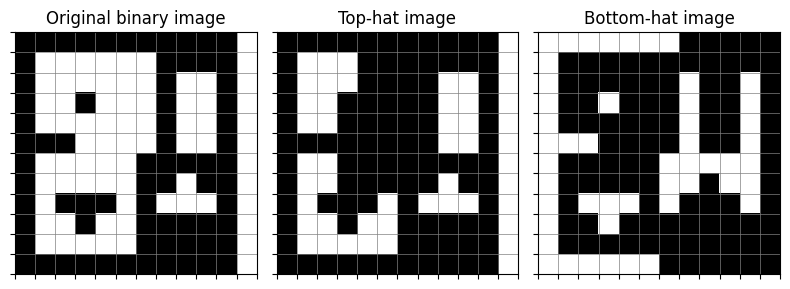

In [ ]:
# Create a synthetic binary image
binary_image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                         [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1],
                         [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
                         [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
                         [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
                         [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
                         [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
                         [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
                         [0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
                         [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
                         [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=np.uint8)

# Define the size and shape of the structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Computes top-hat transformation (image - opening)
top_hat_image = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, structuring_element)

# Computes bottom-hat transformation (closing - image)
bottom_hat_image = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, structuring_element)

# Plot the original and eroded images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.title('Original binary image')
plt.xticks(np.arange(-0.5, 12, 1), [])
plt.yticks(np.arange(-0.5, 12, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Top-hat image
plt.subplot(1, 3, 2)
plt.imshow(top_hat_image, cmap='gray', vmin=0, vmax=1)
plt.title('Top-hat image')
plt.xticks(np.arange(-0.5, 12, 1), [])
plt.yticks(np.arange(-0.5, 12, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Bottom-hat image (Black-hat in OpenCV)
plt.subplot(1, 3, 3)
plt.imshow(bottom_hat_image, cmap='gray', vmin=0, vmax=1)
plt.title('Bottom-hat image')
plt.xticks(np.arange(-0.5, 12, 1), [])
plt.yticks(np.arange(-0.5, 12, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

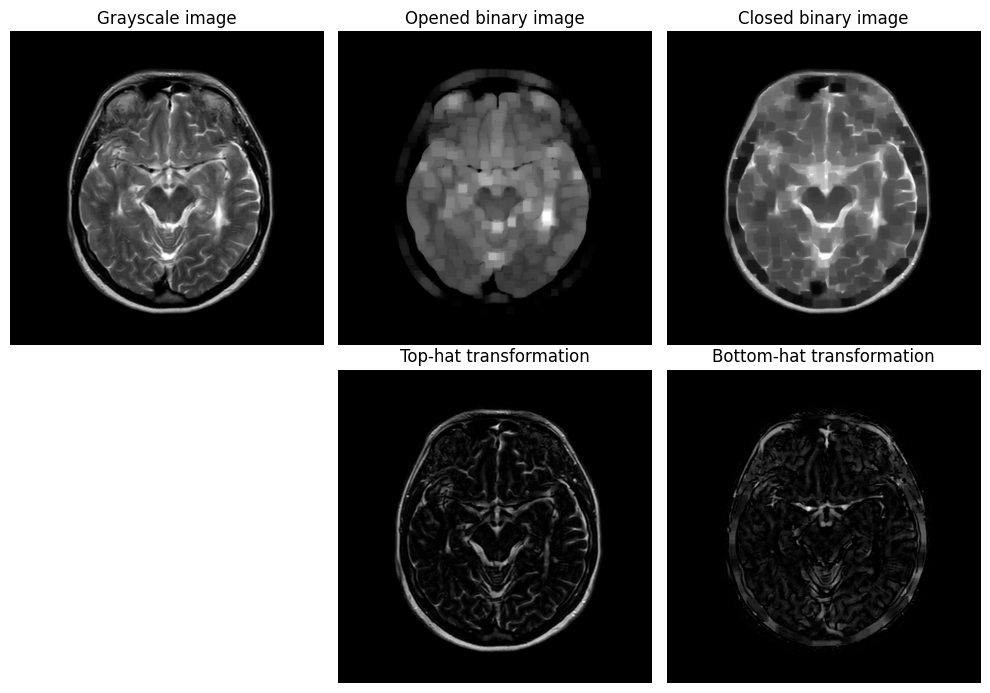

In [ ]:
# Load a grayscale image
image_path = '/content/drive/MyDrive/PIM/Images/MRI_1.jpg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the size and shape of the structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

# Perform opening (erosion followed by dilation)
opened_image = cv2.morphologyEx(grayscale_image, cv2.MORPH_OPEN, structuring_element)

# Perform closing (dilation followed by erosion)
closed_image = cv2.morphologyEx(grayscale_image, cv2.MORPH_CLOSE, structuring_element)

# Computes top-hat transformation (image - opening)
top_hat = cv2.morphologyEx(grayscale_image, cv2.MORPH_TOPHAT, structuring_element)

# Computes bottom-hat transformation (closing - image)
bottom_hat = cv2.morphologyEx(grayscale_image, cv2.MORPH_BLACKHAT, structuring_element)

# Plot the original, opened, and closed images using subplot
plt.figure(figsize=(10, 7))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale image')
plt.axis('off')

# Opened binary image
plt.subplot(2, 3, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened binary image')
plt.axis('off')

# Closed binary image
plt.subplot(2, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed binary image')
plt.axis('off')

# Top-hat transformation
plt.subplot(2, 3, 5)
plt.imshow(top_hat, cmap='gray')
plt.title('Top-hat transformation')
plt.axis('off')

# Bottom-hat transformation
plt.subplot(2, 3, 6)
plt.imshow(bottom_hat, cmap='gray')
plt.title('Bottom-hat transformation')
plt.axis('off')

plt.tight_layout()
plt.show()

## 3.- Boundary Detection

### 3.1. Boundary Extraction

It is defined as the **subtraction of the original image and the erosion of the image with the structuring element**:

$$B = I - (I \ominus S)$$

The **erosion** operation **shrinks the foreground objects**, and **subtracting** the eroded image from the original image **leaves only the outermost pixels** of the objects, which represent the **boundary**.

This operation **highlights the boundaries or edges** of objects within a binary or grayscale image.

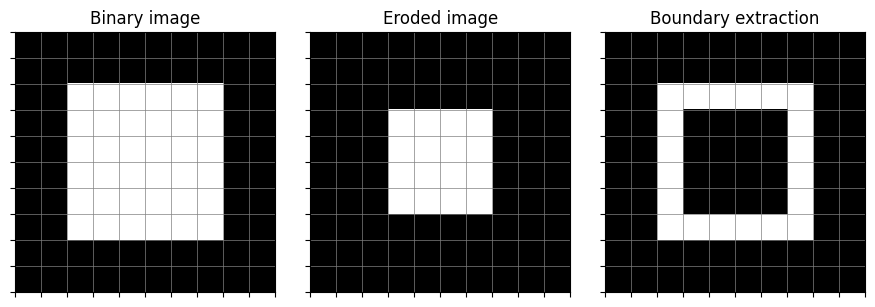

In [ ]:
# Create a synthetic binary image
binary_image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

# Define the size and shape of the structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Perform erosion using the structuring element
eroded_image = cv2.erode(binary_image, structuring_element, iterations=1)

# Computes the boundary extraction as the difference between the image and erosion
boundary_extraction = binary_image - eroded_image

plt.figure(figsize=(9, 3))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.title('Binary image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Eroded image
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray', vmin=0, vmax=1)
plt.title('Eroded image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Boundary extraction
plt.subplot(1, 3, 3)
plt.imshow(boundary_extraction, cmap='gray', vmin=0, vmax=1)
plt.title('Boundary extraction')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

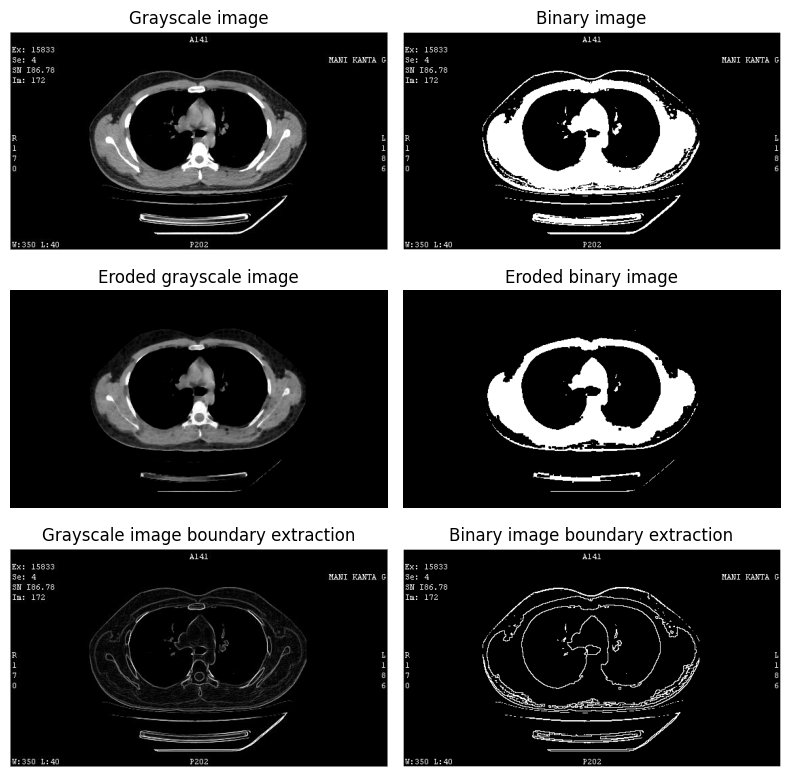

In [ ]:
# Load a grayscale image
image_path = '/content/drive/MyDrive/PIM/Images/CT_3-H.jpeg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image using a threshold
threshold = 50
_, binary_image = cv2.threshold(grayscale_image, threshold, 255, cv2.THRESH_BINARY)

# Define the size and shape of the structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Perform erosion using the structuring element
eroded_image_grayscale = cv2.erode(grayscale_image, structuring_element, iterations=1)
eroded_image_binary = cv2.erode(binary_image, structuring_element, iterations=1)

# Computes the boundary extraction as the difference between the image and erosion
boundary_extraction_grayscale = grayscale_image - eroded_image_grayscale
boundary_extraction_binary = binary_image - eroded_image_binary

# Plot the original, eroded and boundary extraction
plt.figure(figsize=(8, 8))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale image')
plt.axis('off')

# Binary image
plt.subplot(3, 2, 2)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Binary image')
plt.axis('off')

# Eroded grayscale image
plt.subplot(3, 2, 3)
plt.imshow(eroded_image_grayscale, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded grayscale image')
plt.axis('off')

# Eroded binary image
plt.subplot(3, 2, 4)
plt.imshow(eroded_image_binary, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded binary image')
plt.axis('off')

# Boundary extraction grayscale image
plt.subplot(3, 2, 5)
plt.imshow(boundary_extraction_grayscale, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale image boundary extraction')
plt.axis('off')

# Boundary extraction binary image
plt.subplot(3, 2, 6)
plt.imshow(boundary_extraction_binary, cmap='gray', vmin=0, vmax=255)
plt.title('Binary image boundary extraction')
plt.axis('off')

plt.tight_layout()
plt.show()

Boundary extraction can be applied **in conjunction with opening/closing** to improve the results.

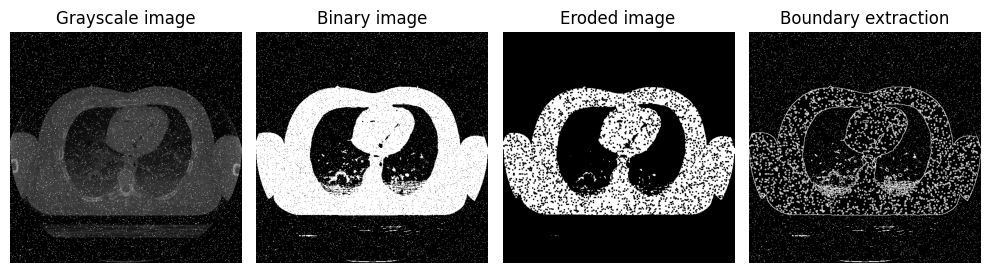

In [ ]:
# Load a grayscale image
image_path = '/content/drive/MyDrive/PIM/Images/CT_saltandpepper.png'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the size and shape of the structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Binarize the image using a threshold
threshold = 50
_, binary_image = cv2.threshold(grayscale_image, threshold, 255, cv2.THRESH_BINARY)

# Perform erosion of the binary image
eroded_binary_image = cv2.erode(binary_image, structuring_element, iterations=1)

# Computes the boundary extraction as the difference between the image and erosion
boundary_extraction = binary_image - eroded_binary_image

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale image')
plt.axis('off')

# Binary image
plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Binary image')
plt.axis('off')

# Eroded binary image
plt.subplot(1, 4, 3)
plt.imshow(eroded_binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded image')
plt.axis('off')

# Boundary extraction image
plt.subplot(1, 4, 4)
plt.imshow(boundary_extraction, cmap='gray', vmin=0, vmax=255)
plt.title('Boundary extraction')
plt.axis('off')

plt.tight_layout()
plt.show()

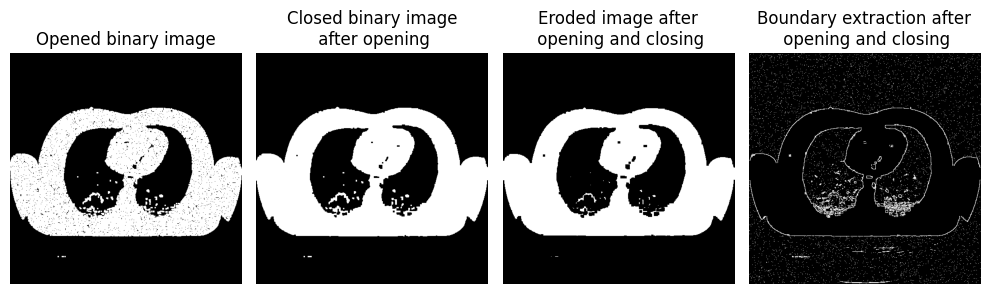

In [ ]:
# Apply opening/closing before erosion to compute boundary extraction

# Perform opening of the binary image
opened_binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)

# Perform closing of the opened binary image
closed_binary_image_after_opening = cv2.morphologyEx(opened_binary_image, cv2.MORPH_CLOSE, structuring_element)

# Perform erosion of the opened and closed binary image
eroded_binary_image_after_opening_and_closing = cv2.erode(closed_binary_image_after_opening, structuring_element, iterations=1)

# Computes the boundary extraction as the difference between the image and erosion
boundary_extraction_opening_closing = binary_image - eroded_binary_image_after_opening_and_closing

# Plot the original, opened, and closed images using subplot
plt.figure(figsize=(10, 5))

# Opened binary image
plt.subplot(1, 4, 1)
plt.imshow(opened_binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Opened binary image')
plt.axis('off')

# Closed binary image
plt.subplot(1, 4, 2)
plt.imshow(closed_binary_image_after_opening, cmap='gray', vmin=0, vmax=255)
plt.title('Closed binary image\n after opening')
plt.axis('off')

# Eroded binary image
plt.subplot(1, 4, 3)
plt.imshow(eroded_binary_image_after_opening_and_closing, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded image after\n opening and closing')
plt.axis('off')

# Boundary extraction image
plt.subplot(1, 4, 4)
plt.imshow(boundary_extraction_opening_closing, cmap='gray', vmin=0, vmax=255)
plt.title('Boundary extraction after\n opening and closing')
plt.axis('off')

plt.tight_layout()
plt.show()

### 3.2. Morphological Gradient

This technique also **highlights the edges or boundaries** within an image based on their intensity. It is used to detect the **transitions between different regions** in a **binary or grayscale** image.

The morphological gradient is defined as the **difference between the dilation and erosion** of the image:

$$G = (I \oplus S) - (I \ominus S)$$

where:

* $G$ is the morphological gradient,
* $I$ is the image,
* $S$ is the structuring element.

It is similar to boundary extraction, although there are some **differences**:

* the morphological gradient results in the **difference between a grown** (dilated) **and a shrunk** (eroded) version of the same image, which corresponds to the edges, whereas boundary extraction does not dilate the original image.

* the morphological gradient **highlights all changes** in the image intensity, providing a **more detailed view** of the transitions in the image (a thicker boundary), while boundary extraction focuses specifically on the **edges** of the objects.

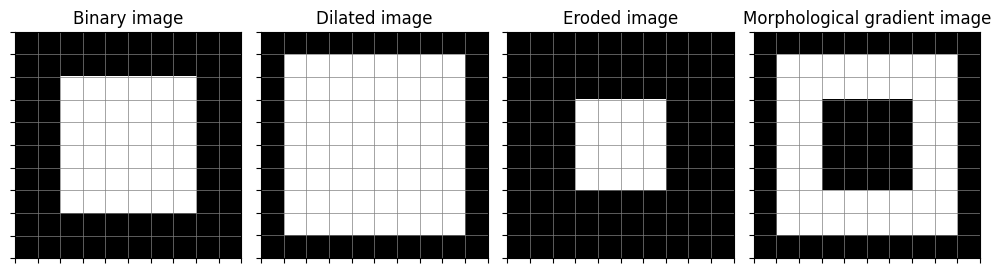

In [ ]:
# Create a synthetic binary image
binary_image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

# Define the size and shape of the structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Manual computation of the morphological gradient
dilated_image = cv2.dilate(binary_image, structuring_element, iterations=1)
eroded_image = cv2.erode(binary_image, structuring_element, iterations=1)
gradient_image = dilated_image - eroded_image

# Calculate the morphological gradient using OpenCV
#gradient_image = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, structuring_element)

plt.figure(figsize=(10, 4))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.title('Binary image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Dilated image
plt.subplot(1, 4, 2)
plt.imshow(dilated_image, cmap='gray', vmin=0, vmax=1)
plt.title('Dilated image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Eroded image
plt.subplot(1, 4, 3)
plt.imshow(eroded_image, cmap='gray', vmin=0, vmax=1)
plt.title('Eroded image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

# Morphological gradient image
plt.subplot(1, 4, 4)
plt.imshow(gradient_image, cmap='gray', vmin=0, vmax=1)
plt.title('Morphological gradient image')
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

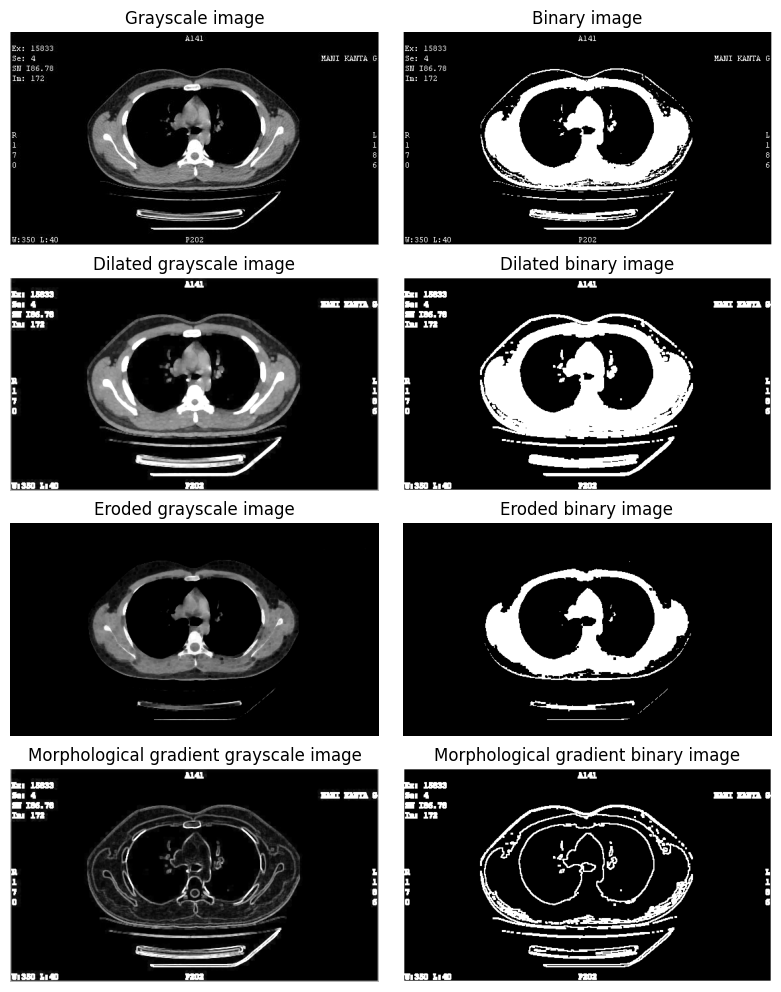

In [ ]:
# Load a grayscale image
image_path = '/content/drive/MyDrive/PIM/Images/CT_3-H.jpeg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image using a threshold
threshold = 50
_, binary_image = cv2.threshold(grayscale_image, threshold, 255, cv2.THRESH_BINARY)

# Define the size and shape of the structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Perform dilation using the structuring element
dilated_image_grayscale = cv2.dilate(grayscale_image, structuring_element, iterations=1)
dilated_image_binary = cv2.dilate(binary_image, structuring_element, iterations=1)

# Perform erosion using the structuring element
eroded_image_grayscale = cv2.erode(grayscale_image, structuring_element, iterations=1)
eroded_image_binary = cv2.erode(binary_image, structuring_element, iterations=1)

# Computes the boundary extraction as the difference between the image and erosion
morph_gradient_grayscale = dilated_image_grayscale - eroded_image_grayscale
morph_gradient_binary = dilated_image_binary - eroded_image_binary

plt.figure(figsize=(8, 10))

# Original image
plt.subplot(4, 2, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale image')
plt.axis('off')

# Binary image
plt.subplot(4, 2, 2)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Binary image')
plt.axis('off')

# Dilated grayscale image
plt.subplot(4, 2, 3)
plt.imshow(dilated_image_grayscale, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated grayscale image')
plt.axis('off')

# Dilated binary image
plt.subplot(4, 2, 4)
plt.imshow(dilated_image_binary, cmap='gray', vmin=0, vmax=255)
plt.title('Dilated binary image')
plt.axis('off')

# Eroded grayscale image
plt.subplot(4, 2, 5)
plt.imshow(eroded_image_grayscale, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded grayscale image')
plt.axis('off')

# Eroded binary image
plt.subplot(4, 2, 6)
plt.imshow(eroded_image_binary, cmap='gray', vmin=0, vmax=255)
plt.title('Eroded binary image')
plt.axis('off')

# Morphological gradient grayscale image
plt.subplot(4, 2, 7)
plt.imshow(morph_gradient_grayscale, cmap='gray', vmin=0, vmax=255)
plt.title('Morphological gradient grayscale image')
plt.axis('off')

# Morphological gradient binary image
plt.subplot(4, 2, 8)
plt.imshow(morph_gradient_binary, cmap='gray', vmin=0, vmax=255)
plt.title('Morphological gradient binary image')
plt.axis('off')

plt.tight_layout()
plt.show()

## 4.- Shape Detection

### 4.1. Hit-or-Miss Transform


The Hit-or-Miss Transform is applied to **find specific shapes or patterns** in an image (such as corners) by matching them with a structuring element (and its variations).

The hit-or-miss transform is the **basis for more complex morphological operations** like pattern recognition, shape detection, and image analysis.

This technique applies **only to binarized images**, with only two pixel intensities: foreground (1) and background (0).

Unlike previous morphological methods, it uses **two complementary structuring elements**, $B_1$ (_hit_) and $B_2$ (_miss_), for detecting shapes in the foreground and in the background simultaneously.

It can be defined as:

$$I \otimes B = (I \ominus B_1) \cap (I^c \ominus B_2)$$

where:

* $\otimes$ denotes the Hit-or-Miss transform,
* $I$ is the binary input image,
* $B_1$ and $B_2$ are the structuring elements,
* $\ominus$ indicates the erosion operation,
* $\cap$ represents the intersection operation,
* $I^c$ is the complement of the image $I$.

The result of the Hit-or-Miss Transform is **another binary image** $I'$ where the **locations that match the pattern** defined by $B_1$ and $B_2$ **are marked**.

Combined structuring element:
[[-1  1 -1]
 [ 1  1  1]
 [-1  1 -1]]


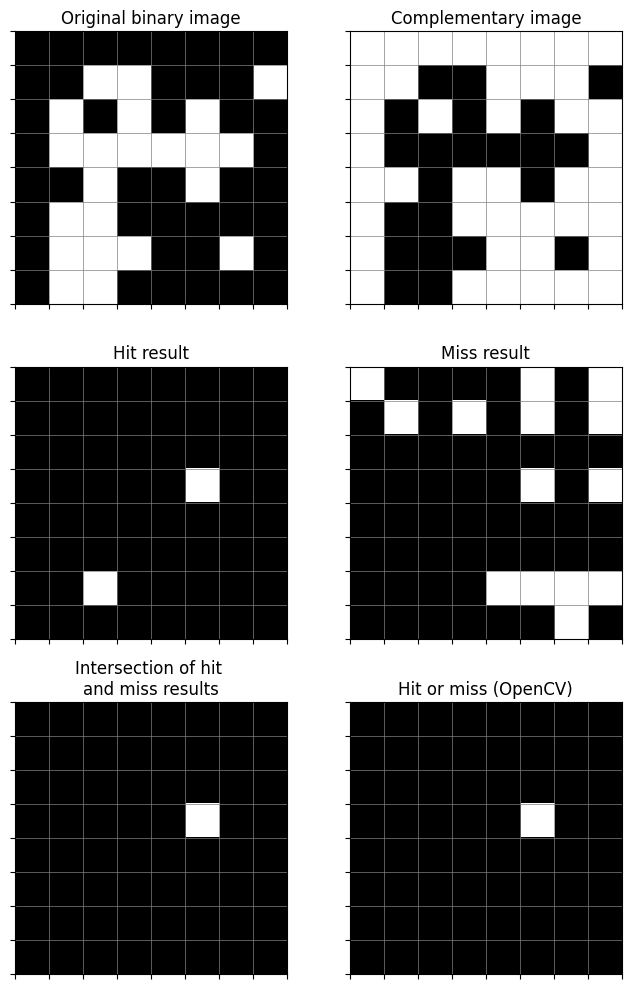

In [ ]:
# Define the binary image
binary_image = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 1],
        [0, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 0],
        [0, 1, 1, 0, 0, 0, 0, 0]
], dtype=np.uint8)

# Define the structuring elements for hit and miss
hit_element = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)
miss_element = np.array([[1, 0, 1],
                         [0, 0, 0],
                         [1, 0, 1]], dtype=np.uint8)

# Method #1: Perform the hit-or-miss transform using individual steps
complemented_image = cv2.bitwise_not(binary_image)
hit_result = cv2.erode(binary_image, hit_element)
miss_result = cv2.erode(complemented_image, miss_element)
hit_or_miss_result = cv2.bitwise_and(hit_result, miss_result)

# Method #2

# Combined structuring element (values: -1, 0, 1)
# 1 represents pixels that must match the foreground
# -1 represents pixels that must match the background
# 0 represents pixels that are irrelevant
combined_element = (hit_element - miss_element).astype(np.int8)
#combined_element = np.array([[0, 1, -1],[1, 1, 1],[0, 1, -1]], dtype=np.int8)
print('Combined structuring element:')
print(combined_element)

# Apply the hit-or-miss transform using OpenCV
hit_or_miss = cv2.morphologyEx(binary_image, cv2.MORPH_HITMISS, combined_element)


plt.figure(figsize=(7, 10))

plt.subplot(3, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original binary image')
plt.xticks(np.arange(-0.5, 8, 1), [])
plt.yticks(np.arange(-0.5, 8, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 2)
plt.imshow(complemented_image, cmap='gray')
plt.title('Complementary image')
plt.xticks(np.arange(-0.5, 8, 1), [])
plt.yticks(np.arange(-0.5, 8, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 3)
plt.imshow(hit_result, cmap='gray')
plt.title('Hit result')
plt.xticks(np.arange(-0.5, 8, 1), [])
plt.yticks(np.arange(-0.5, 8, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 4)
plt.imshow(miss_result, cmap='gray')
plt.title('Miss result')
plt.xticks(np.arange(-0.5, 8, 1), [])
plt.yticks(np.arange(-0.5, 8, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 5)
plt.imshow(hit_or_miss_result, cmap='gray')
plt.title('Intersection of hit \nand miss results')
plt.xticks(np.arange(-0.5, 8, 1), [])
plt.yticks(np.arange(-0.5, 8, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 6)
plt.imshow(hit_or_miss, cmap='gray')
plt.title('Hit or miss (OpenCV)')
plt.xticks(np.arange(-0.5, 8, 1), [])
plt.yticks(np.arange(-0.5, 8, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

Combined structuring element:
[[-1 -1 -1 -1 -1]
 [-1  1  1  1 -1]
 [-1  1  1  1 -1]
 [-1  1  1  1 -1]
 [-1 -1 -1 -1 -1]]


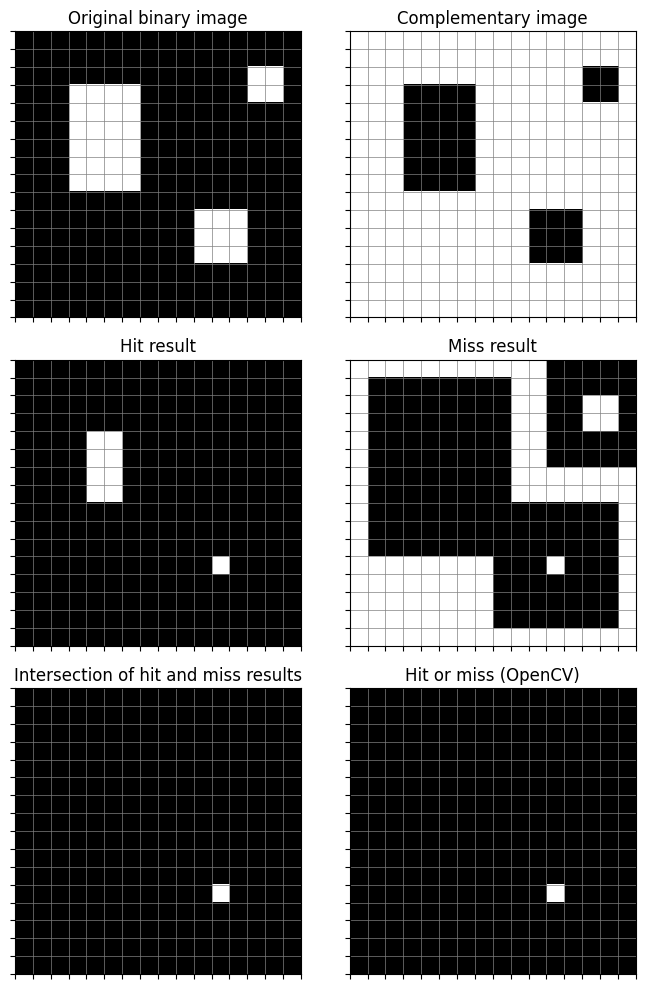

In [ ]:
# Create a synthetic image
binary_image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

# Structuring elements to detect a 3x3 object
hit_element = np.array([[0, 0, 0, 0, 0],
                        [0, 1, 1, 1, 0],
                        [0, 1, 1, 1, 0],
                        [0, 1, 1, 1, 0],
                        [0, 0, 0, 0, 0]], dtype=np.uint8)
miss_element = np.array([[1, 1, 1, 1, 1],
                         [1, 0, 0, 0, 1],
                         [1, 0, 0, 0, 1],
                         [1, 0, 0, 0, 1],
                         [1, 1, 1, 1, 1]], dtype=np.uint8)

"""
# Structuring elements to detect a top-right corner
hit_element = np.array([[0, 0, 0],
                        [1, 1, 0],
                        [0, 1, 0]], dtype=np.uint8)
miss_element = np.array([[1, 1, 1],
                         [0, 0, 1],
                         [0, 0, 1]], dtype=np.uint8)
"""

# Combined structuring element (values: -1, 0, 1)
# 1 represents pixels that must match the foreground
# -1 represents pixels that must match the background
# 0 represents pixels that are irrelevant
combined_element = (hit_element - miss_element).astype(np.int8)
print("Combined structuring element:")
print(combined_element)

# Perform the hit-or-miss transform using individual steps
complemented_image = cv2.bitwise_not(binary_image)
hit_result = cv2.erode(binary_image, hit_element)
miss_result = cv2.erode(complemented_image, miss_element)
hit_or_miss_result = cv2.bitwise_and(hit_result, miss_result)

# Apply the hit-or-miss transform using OpenCV
hit_or_miss = cv2.morphologyEx(binary_image, cv2.MORPH_HITMISS, combined_element)

plt.figure(figsize=(7, 10))

# Plot with simpler subplot form
plt.subplot(3, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original binary image')
plt.xticks(np.arange(-0.5, 16, 1), [])
plt.yticks(np.arange(-0.5, 16, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 2)
plt.imshow(complemented_image, cmap='gray')
plt.title('Complementary image')
plt.xticks(np.arange(-0.5, 16, 1), [])
plt.yticks(np.arange(-0.5, 16, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 3)
plt.imshow(hit_result, cmap='gray')
plt.title('Hit result')
plt.xticks(np.arange(-0.5, 16, 1), [])
plt.yticks(np.arange(-0.5, 16, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 4)
plt.imshow(miss_result, cmap='gray')
plt.title('Miss result')
plt.xticks(np.arange(-0.5, 16, 1), [])
plt.yticks(np.arange(-0.5, 16, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 5)
plt.imshow(hit_or_miss_result, cmap='gray')
plt.title('Intersection of hit and miss results')
plt.xticks(np.arange(-0.5, 16, 1), [])
plt.yticks(np.arange(-0.5, 16, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.subplot(3, 2, 6)
plt.imshow(hit_or_miss, cmap='gray')
plt.title('Hit or miss (OpenCV)')
plt.xticks(np.arange(-0.5, 16, 1), [])
plt.yticks(np.arange(-0.5, 16, 1), [])
plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

## 5.- Skeletonization


Skeletonization is a morphological operation that **reduces objects in a binary image to their basic structural form**, often referred to as the “**skeleton**”.

The goal of skeletonization is to **represent the shape of objects with minimal thickness** (ideally centered within the original shape), typically one pixel wide, while **retaining the overall connectivity and structure** of the original objects.

The process **iteratively erodes** the object until it is reduced to a skeletal form (only pixels with connectivity are retained). However, **noise** can affect the results, and small imperfections in the original image can lead to irregularities in the skeleton.

Skeletonization can serve as a **simplified representation** of objects, and so, it is often used to **analyze their basic shape and measure their length**.

In medical image processing, skeletonization helps in the analysis of **anatomical structures**, such as blood vessels or bones.


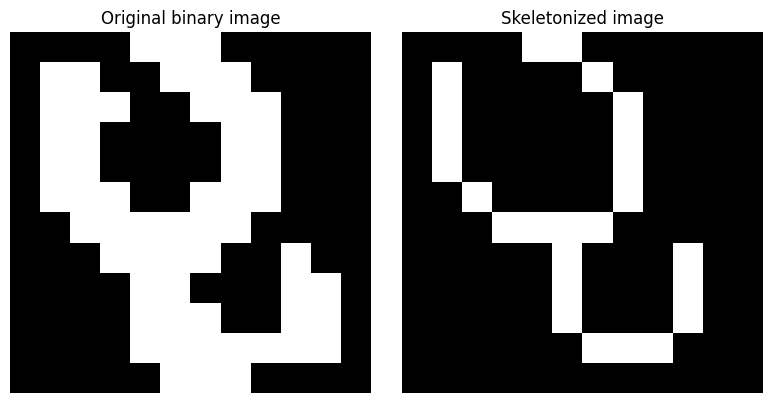

In [ ]:
from skimage import morphology

# Create a simple binary image
binary_image = np.array([
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
], dtype=np.uint8)

# Perform skeletonization
skeleton = morphology.skeletonize(binary_image)

# Plot the original and skeletonized images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original binary image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title('Skeletonized image')
plt.axis('off')

plt.tight_layout()
plt.show()

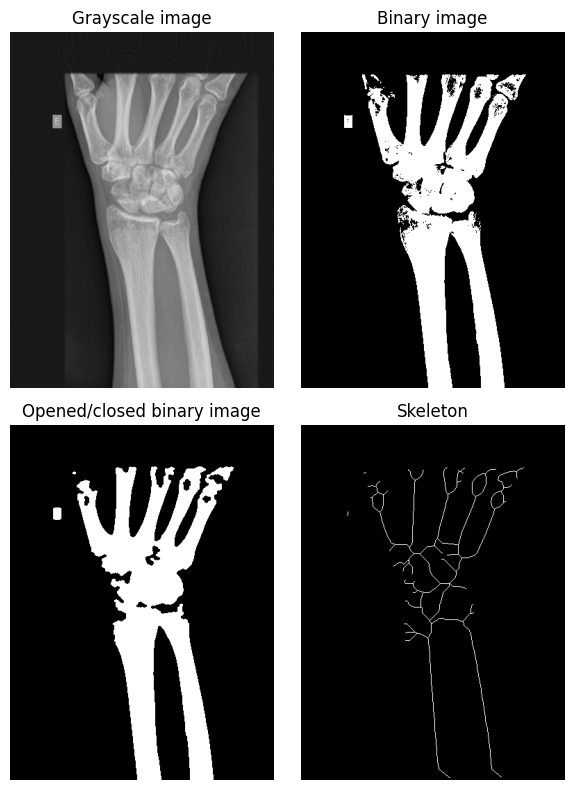

In [ ]:
from skimage import morphology # imports the morphology module from the scikit-image library

# Load a grayscale image
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_2.png'
threshold = 140
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image using a threshold
_, binary_image = cv2.threshold(grayscale_image, threshold, 255, cv2.THRESH_BINARY)

# Define a structuring element (3x3 rectangular kernel)
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Perform opening
opened_binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)

# Perform closing
closed_binary_image_after_opening = cv2.morphologyEx(opened_binary_image, cv2.MORPH_CLOSE, structuring_element)

# Convert the closed binary image from 0 and 255 to 0 and 1 (True/False for skeletonize)
binary_for_skeleton = closed_binary_image_after_opening // 255

# Perform skeletonization
skeleton = morphology.skeletonize(binary_for_skeleton)

# Convert the boolean skeleton array (True, False) to an integer array
skeleton_int = skeleton.astype(np.uint8) * 255

# Plot the original, opened, and closed images using subplot
plt.figure(figsize=(6, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale image')
plt.axis('off')

# Binary image
plt.subplot(2, 2, 2)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=255)
plt.title('Binary image')
plt.axis('off')

# Open/Closed binary image
plt.subplot(2, 2, 3)
plt.imshow(closed_binary_image_after_opening, cmap='gray', vmin=0, vmax=255)
plt.title('Opened/closed binary image')
plt.axis('off')

# Skeleton
plt.subplot(2, 2, 4)
plt.imshow(skeleton_int, cmap='gray', vmin=0, vmax=255)
plt.title('Skeleton')
plt.axis('off')

plt.tight_layout()
plt.show()

## References

* González, Rafael C., _Digital image processing: Chapter 9 (Morphological Image Processing)_. Prentice Hall,. 2018. 9780132345637

* Chityala, Ravishankar, _Image Processing and Acquisition Using Python: Chapter 9 (Morphological Operations)_. Chapman and Hall/CRC, 2022. 9780367531577

* Birkfellner, Wolfgang, _Applied Medical Image Processing - A Basic Course: Chapter 6 (Segmentation)_. CRC Press, 2014. 9781466555570

* Toennies, Klaus D., _Guide to Medical Image Analysis - Methods and Algorithms: Chapter 11 (Shape, Appearance and Spatial Relationships)_. Springer, 2017. 9781447174035